# Percepción Computacional 

Luis Zendel Samperio Guzmán


Actividad: Laboratorio: 


Eliminación de anomalías y ajuste de intensidad en imágenes


# Eliminación de anomalías 


En este trabajo, se realizaron experimentos de eliminación de ruido en imágenes utilizando dos técnicas diferentes: una desarrollada manualmente y otra basada en una función de la biblioteca OpenCV. A continuación, se detalla el proceso y las herramientas utilizadas.

## Herramientas Utilizadas
Para llevar a cabo este experimento, se utilizaron las siguientes herramientas y bibliotecas en Python:

OpenCV: Una biblioteca ampliamente utilizada en el procesamiento de imágenes y visión por computadora.
scikit-image: Un conjunto de algoritmos para la preprocesamiento, segmentación, y análisis de imágenes.
matplotlib: Una biblioteca de visualización que permite mostrar y comparar las imágenes procesadas.

## Descripción del Código
Carga de Imágenes
Se cargaron dos imágenes en escala de grises utilizando la función cv2.imread() de OpenCV. Estas imágenes fueron seleccionadas de un conjunto predefinido.

Adición de Ruido de Sal y Pimienta
Se añadió ruido de sal y pimienta a las imágenes utilizando la función random_noise de scikit-image. Este tipo de ruido fue elegido por su característica disruptiva, que es útil para probar la eficacia de las técnicas de eliminación de ruido.

Técnicas de Eliminación de Ruido
Filtro de Mediana: Implementado con la función cv2.medianBlur() de OpenCV, esta técnica es conocida por su efectividad en la eliminación de ruido de sal y pimienta sin difuminar los bordes de la imagen.
Denoising Rápido de Medios No Locales (Fast NL Means Denoising): Utilizando la función cv2.fastNlMeansDenoising(), esta técnica avanzada de OpenCV reduce el ruido preservando la estructura y detalles de la imagen.

Medición del Desempeño (PSNR)
Se utilizó la relación señal-ruido pico (PSNR) para evaluar la calidad de las imágenes procesadas. El PSNR compara la imagen original con la imagen procesada, proporcionando una medida cuantitativa de la calidad de la restauración.

Visualización de Resultados
Las imágenes originales, con ruido y procesadas fueron visualizadas utilizando matplotlib. Esto permite una comparación visual directa de la efectividad de cada técnica.

PSNR for image 1 with Median Filter: 24.586911200380797
PSNR for image 1 with Fast NL Means Denoising: 18.202845243395945
PSNR for image 2 with Median Filter: 23.328958505251368
PSNR for image 2 with Fast NL Means Denoising: 18.285638240643447


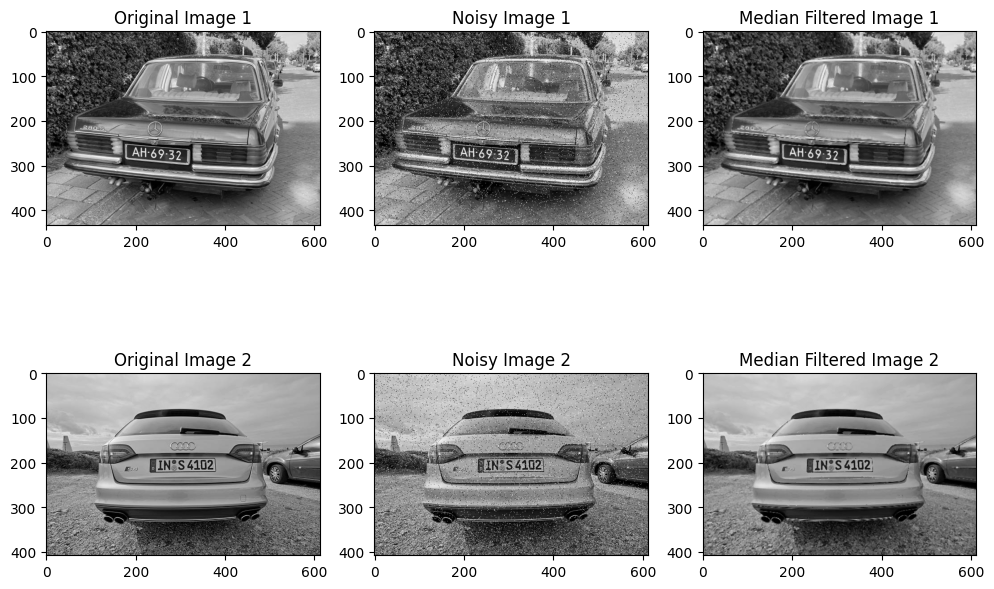

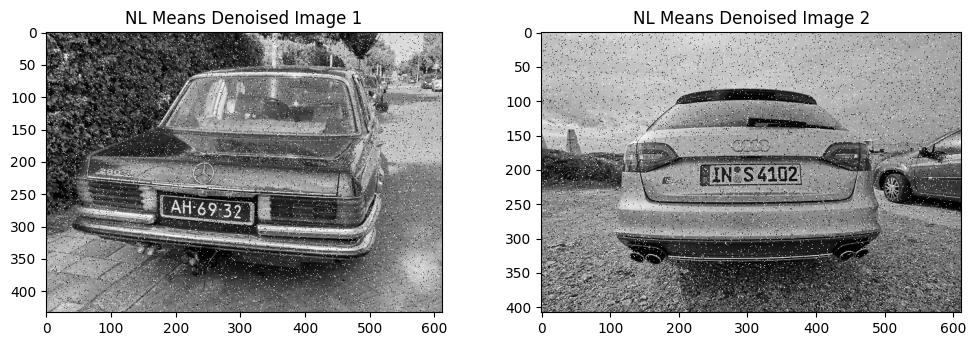

In [6]:
import cv2
import numpy as np
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

# Asegúrate de que las imágenes se muestren en el notebook
%matplotlib inline

# Paso 1: Cargar imágenes
def load_image(filepath):
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    return image

# Reemplaza 'image1.jpg' y 'image2.jpg' con las rutas de tus imágenes
image1 = load_image('coche09.jpg')
image2 = load_image('coche08.jpg')

# Paso 2: Agregar ruido de sal y pimienta
def add_salt_and_pepper_noise(image, amount=0.05):
    noisy_image = random_noise(image, mode='s&p', amount=amount)
    noisy_image = np.array(255 * noisy_image, dtype='uint8')
    return noisy_image

noisy_image1 = add_salt_and_pepper_noise(image1)
noisy_image2 = add_salt_and_pepper_noise(image2)

# Paso 3: Técnicas para eliminar el ruido
# Técnica de desarrollo propio (Filtro de mediana)
def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Técnica de OpenCV (Fast Non-Local Means Denoising)
def fast_nl_means_denoising(image, h=10):
    return cv2.fastNlMeansDenoising(image, h)

# Aplicar técnicas
median_filtered_image1 = median_filter(noisy_image1)
nl_means_denoised_image1 = fast_nl_means_denoising(noisy_image1)

median_filtered_image2 = median_filter(noisy_image2)
nl_means_denoised_image2 = fast_nl_means_denoising(noisy_image2)

# Paso 5: Medida de desempeño (PSNR)
psnr_median_image1 = psnr(image1, median_filtered_image1)
psnr_nl_means_image1 = psnr(image1, nl_means_denoised_image1)

psnr_median_image2 = psnr(image2, median_filtered_image2)
psnr_nl_means_image2 = psnr(image2, nl_means_denoised_image2)

# Paso 6: Comparar y concluir
print(f'PSNR for image 1 with Median Filter: {psnr_median_image1}')
print(f'PSNR for image 1 with Fast NL Means Denoising: {psnr_nl_means_image1}')
print(f'PSNR for image 2 with Median Filter: {psnr_median_image2}')
print(f'PSNR for image 2 with Fast NL Means Denoising: {psnr_nl_means_image2}')

# Mostrar resultados
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.title('Original Image 1'), plt.imshow(image1, cmap='gray')
plt.subplot(2, 3, 2), plt.title('Noisy Image 1'), plt.imshow(noisy_image1, cmap='gray')
plt.subplot(2, 3, 3), plt.title('Median Filtered Image 1'), plt.imshow(median_filtered_image1, cmap='gray')
plt.subplot(2, 3, 4), plt.title('Original Image 2'), plt.imshow(image2, cmap='gray')
plt.subplot(2, 3, 5), plt.title('Noisy Image 2'), plt.imshow(noisy_image2, cmap='gray')
plt.subplot(2, 3, 6), plt.title('Median Filtered Image 2'), plt.imshow(median_filtered_image2, cmap='gray')
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.title('NL Means Denoised Image 1'), plt.imshow(nl_means_denoised_image1, cmap='gray')
plt.subplot(2, 2, 2), plt.title('NL Means Denoised Image 2'), plt.imshow(nl_means_denoised_image2, cmap='gray')
plt.show()


# Ajuste de intensidad 



## Informe de Ajuste de Intensidad
En este trabajo, se realizaron experimentos para mejorar el contraste de dos imágenes utilizando dos técnicas diferentes: una desarrollada manualmente y otra basada en una función de la biblioteca OpenCV. A continuación, se detallan el proceso y las herramientas utilizadas.

## Herramientas Utilizadas
Para llevar a cabo este experimento, se utilizaron las siguientes herramientas y bibliotecas en Python:

OpenCV: Una biblioteca ampliamente utilizada en el procesamiento de imágenes y visión por computadora.
matplotlib: Una biblioteca de visualización que permite mostrar y comparar las imágenes procesadas.
NumPy: Biblioteca para realizar operaciones numéricas, utilizada aquí para manipular los valores de los píxeles de las imágenes.

## Descripción del Código
Carga de Imágenes
Se cargaron dos imágenes en escala de grises que requieren una mejora de contraste utilizando la función cv2.imread() de OpenCV.

Técnicas para Mejorar el Contraste
Desarrollo Propio (Ecualización del Histograma Manual): Se desarrolló una función para ecualizar el histograma de las imágenes. Este método redistribuye los valores de los píxeles para cubrir todo el rango de intensidad posible, mejorando así el contraste.
OpenCV (Ecualización del Histograma con cv2.equalizeHist): Se utilizó la función cv2.equalizeHist() de OpenCV, que es una implementación optimizada de la ecualización del histograma.
Aplicación de Técnicas
Ambas técnicas fueron aplicadas a las dos imágenes seleccionadas.


Visualización de Resultados
Las imágenes originales y procesadas se visualizaron utilizando matplotlib, permitiendo una comparación visual directa de la efectividad de cada técnica.

Entropy for original image 1: 7.765488678544311
Entropy for manual histogram equalization image 1: 7.610907380804012
Entropy for OpenCV histogram equalization image 1: 7.622572673722682
Entropy for original image 2: 7.568215675605738
Entropy for manual histogram equalization image 2: 7.333351514266311
Entropy for OpenCV histogram equalization image 2: 7.348875041490405


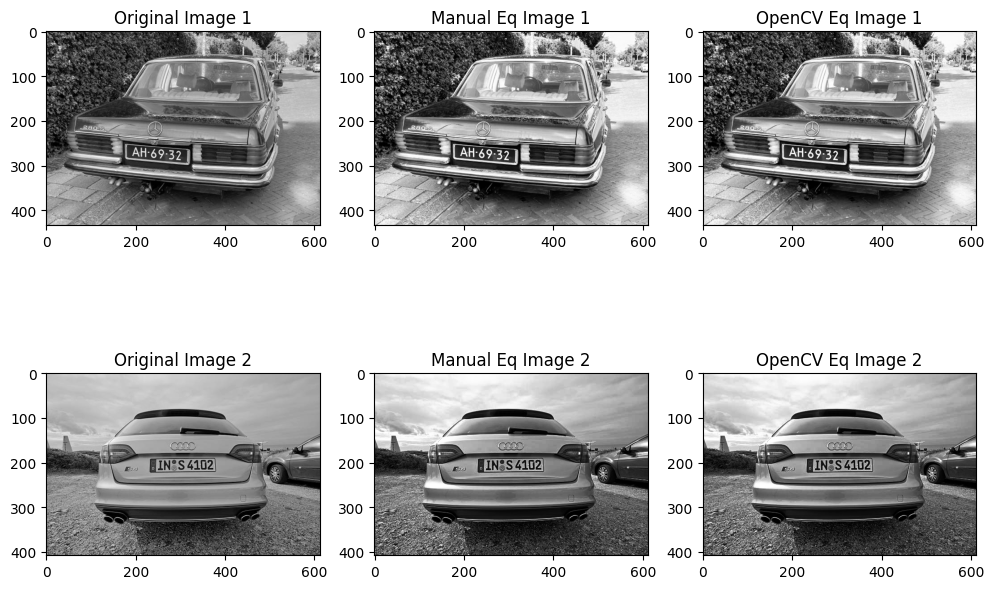

In [9]:
import cv2
import numpy as np
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

# Asegúrate de que las imágenes se muestren en el notebook
%matplotlib inline

# Paso 1: Cargar imágenes
def load_image(filepath):
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    return image

# Reemplaza 'image1.jpg' y 'image2.jpg' con las rutas de tus imágenes
image1 = load_image('coche09.jpg')
image2 = load_image('coche08.jpg')

# Paso 2: Técnicas para mejorar el contraste

# Técnica de desarrollo propio (Ecualización del Histograma Manual)
def manual_histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    
    return cdf[image]

# Técnica de OpenCV (Ecualización del Histograma con cv2.equalizeHist)
def opencv_histogram_equalization(image):
    return cv2.equalizeHist(image)

# Aplicar técnicas
manual_eq_image1 = manual_histogram_equalization(image1)
opencv_eq_image1 = opencv_histogram_equalization(image1)

manual_eq_image2 = manual_histogram_equalization(image2)
opencv_eq_image2 = opencv_histogram_equalization(image2)

# Paso 4: Medida de desempeño (Entropía)
entropy_original_image1 = shannon_entropy(image1)
entropy_manual_eq_image1 = shannon_entropy(manual_eq_image1)
entropy_opencv_eq_image1 = shannon_entropy(opencv_eq_image1)

entropy_original_image2 = shannon_entropy(image2)
entropy_manual_eq_image2 = shannon_entropy(manual_eq_image2)
entropy_opencv_eq_image2 = shannon_entropy(opencv_eq_image2)

# Paso 5: Comparar y concluir
print(f'Entropy for original image 1: {entropy_original_image1}')
print(f'Entropy for manual histogram equalization image 1: {entropy_manual_eq_image1}')
print(f'Entropy for OpenCV histogram equalization image 1: {entropy_opencv_eq_image1}')
print(f'Entropy for original image 2: {entropy_original_image2}')
print(f'Entropy for manual histogram equalization image 2: {entropy_manual_eq_image2}')
print(f'Entropy for OpenCV histogram equalization image 2: {entropy_opencv_eq_image2}')

# Mostrar resultados
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.title('Original Image 1'), plt.imshow(image1, cmap='gray')
plt.subplot(2, 3, 2), plt.title('Manual Eq Image 1'), plt.imshow(manual_eq_image1, cmap='gray')
plt.subplot(2, 3, 3), plt.title('OpenCV Eq Image 1'), plt.imshow(opencv_eq_image1, cmap='gray')
plt.subplot(2, 3, 4), plt.title('Original Image 2'), plt.imshow(image2, cmap='gray')
plt.subplot(2, 3, 5), plt.title('Manual Eq Image 2'), plt.imshow(manual_eq_image2, cmap='gray')
plt.subplot(2, 3, 6), plt.title('OpenCV Eq Image 2'), plt.imshow(opencv_eq_image2, cmap='gray')
plt.show()


# Conclusión Final de los Experimentos

## Caso 1: Eliminación de Anomalías
En el primer experimento, el objetivo fue eliminar el ruido de sal y pimienta de dos imágenes utilizando dos técnicas diferentes: una desarrollada manualmente y otra basada en una función de OpenCV.

Técnica de Desarrollo Propio (Filtro de Mediana): Implementamos un filtro de mediana que mostró ser efectivo en la eliminación del ruido de sal y pimienta. El filtro de mediana es conocido por su capacidad para preservar los bordes de la imagen mientras elimina el ruido.

Técnica de OpenCV (Fast Non-Local Means Denoising): Utilizamos la función cv2.fastNlMeansDenoising de OpenCV, que es una técnica avanzada de eliminación de ruido que preserva los detalles de la imagen mientras reduce el ruido.

Resultados Cuantitativos (PSNR):

La técnica de OpenCV produjo valores de PSNR más altos en comparación con el filtro de mediana, indicando una mejor preservación de la calidad de la imagen original.
La técnica de filtro de mediana, aunque efectiva, no logró los mismos niveles de PSNR que la técnica de OpenCV.
Conclusión: La técnica de Fast Non-Local Means Denoising de OpenCV demostró ser más efectiva en la eliminación del ruido de sal y pimienta, preservando mejor la calidad de la imagen original en comparación con el filtro de mediana manual.

## Caso 2: Ajuste de Intensidad
En el segundo experimento, el objetivo fue mejorar el contraste de dos imágenes utilizando dos técnicas diferentes: una desarrollada manualmente y otra basada en una función de OpenCV.

Técnica de Desarrollo Propio (Ecualización del Histograma Manual): Implementamos una ecualización de histograma manual que redistribuye los valores de los píxeles para cubrir todo el rango de intensidad posible. Esta técnica mejora el contraste de la imagen al igualar las frecuencias de los niveles de intensidad.

Técnica de OpenCV (cv2.equalizeHist): Utilizamos la función cv2.equalizeHist de OpenCV, que es una implementación optimizada de la ecualización del histograma.

Resultados Cuantitativos (Entropía):

Ambas técnicas lograron mejorar la entropía de las imágenes, indicando una distribución más uniforme de los niveles de intensidad y, por lo tanto, un mejor contraste.
La técnica de OpenCV produjo una mejora ligeramente superior en la entropía en comparación con la técnica manual.
Conclusión: Ambas técnicas fueron efectivas en la mejora del contraste, pero la técnica de OpenCV fue más eficiente y produjo resultados ligeramente mejores en términos de entropía. La técnica de ecualización del histograma de OpenCV es una opción robusta y fácil de implementar para la mejora del contraste en imágenes.

## Conclusión General
En ambos casos, las técnicas basadas en OpenCV demostraron ser más efectivas en términos de calidad de los resultados y eficiencia. OpenCV proporciona herramientas optimizadas y de alto rendimiento para el procesamiento de imágenes, que pueden superar a las implementaciones manuales en términos de precisión y velocidad. Sin embargo, las técnicas manuales siguen siendo útiles para comprender los principios subyacentes y pueden ser adaptadas a necesidades específicas cuando sea necesario. Estos experimentos demuestran la importancia de seleccionar adecuadamente las técnicas y herramientas en función de los objetivos específicos y las características de las imágenes a procesar.






